<H2>Cloud Counselage IP</H2>

<H1>Data Science Project</H1>

<h4>Project name: Real/Fake News Classifier</h4>
<h4>Project by:   PRASFUR TIWARI</h4>

<H4>PROBLEM STATEMENT</H4>

<p>To build a model to accurately classify a piece of news as <b>REAL</b> or <b>FAKE</b>.

Using sklearn,  build a TfidfVectorizer on the provided dataset. Then, initialize a PassiveAggressive Classifier and fit the model. In the end, the accuracy score and the confusion matrix tell us how well our model fares.

On completion, create a GitHub account and create a repository. Commit your python code inside the newly created repository.</p>

<h2>Importing required modules</h2>

In [1]:
print("Loading Modules...")

import matplotlib
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

print("\nModules Loaded!")

Loading Modules...

Modules Loaded!


<h2>Data Gathering/Collection</h2>

In [5]:
print("\nReading Dataset")

df=pd.read_csv('C:\\Users\\smile\\Desktop\\Prasfur\\IP\\news.csv')
df.head()


Reading Dataset


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<h1>Data Wrangling</h1>

<h3>Setting Index</h3>

In [6]:
df.set_index('Unnamed: 0',inplace=True)
df.head()

,title,text,label
Unnamed: 0,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


<h1>Data Cleaning</h1>

<p>Checking for null, none and NaN values.<p>

In [17]:
df.isnull()

,title,text,label
Unnamed: 0,,,
8476,False,False,False
10294,False,False,False
3608,False,False,False
10142,False,False,False
875,False,False,False
...,...,...,...
4490,False,False,False
8062,False,False,False
8622,False,False,False


<h4>Sum of all null values</h4>

In [18]:
df.isnull().sum()

title    0
text     0
label    0
dtype: int64

<h4>Heatmap to check uncertainty in data</h4>

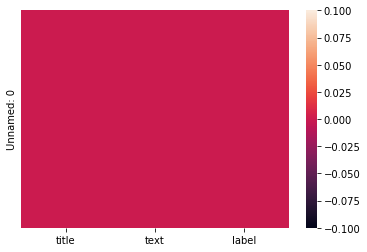

In [19]:
sns.heatmap(df.isnull(),yticklabels=False)

<h2>Seperating columns for classification</h2>

In [7]:
X=df[['title','text']]  # Independent Variables
y=df[['label']]         # Dependent Variable

<h2>Train/Test Split</h2>

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=4)
print('Train set:\nPredictor:',X_train.shape,'\nPredicted:',y_train.shape)
print('\nTest set:\nPredictor:',X_test.shape,'\nPredicted:',y_test.shape)

Train set:
Predictor: (4244, 2) 
Predicted: (4244, 1)

Test set:
Predictor: (2091, 2) 
Predicted: (2091, 1)


<h1>Model Fitting</h1>

<h2>Creating vector 1</h2>

<p>Here, Tf-idf is generated for <b>'title'</b> column.</p>

In [9]:
tf1=TfidfVectorizer(stop_words='english',max_df=0.7)
X_trainTF1=tf1.fit_transform(X_train['title'])
X_testTF1=tf1.transform(X_test['title'])
pac1=PassiveAggressiveClassifier()
pac1.fit(X_trainTF1,y_train)
pred1=pac1.predict(X_testTF1)
print('\nPredicted values of column \'title\':\n')
pred1

C:\Users\smile\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Predicted values of column 'title':



array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'REAL', 'FAKE'], dtype='<U4')

<h2>Creating vector 2</h2>

<p>Here, Tf-idf is generated for <b>'text'</b> column.</p>

In [10]:
tf2=TfidfVectorizer(stop_words='english',max_df=0.7)
X_trainTF2=tf2.fit_transform(X_train['text'])
X_testTF2=tf2.transform(X_test['text'])
pac2=PassiveAggressiveClassifier()
pac2.fit(X_trainTF2,y_train)
pred2=pac2.predict(X_testTF2)
print('\nPredicted values of column \'text\':\n')
pred2


Predicted values of column 'text':



C:\Users\smile\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['FAKE', 'FAKE', 'REAL', ..., 'REAL', 'REAL', 'FAKE'], dtype='<U4')

<h2>Finding Accuracy</h2>


<h3>Accuracy of <b>'title'</b> column.</h3>

In [11]:
print('\nFor \'title\' column: ')
print('\nAccuracy: ',metrics.accuracy_score(y_test,pred1))
print('Classification Report:\n',classification_report(y_test,pred1))
mat1=confusion_matrix(y_test,pred1)
print('\nConfusion Matrix:\n')
mat1



Finding accuracy:

For 'title' column: 

Accuracy:  0.773792443806791
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.78      0.76      0.77      1036
        REAL       0.77      0.79      0.78      1055

    accuracy                           0.77      2091
   macro avg       0.77      0.77      0.77      2091
weighted avg       0.77      0.77      0.77      2091


Confusion Matrix:



array([[789, 247],
       [226, 829]], dtype=int64)

<h3>Accuracy of <b>'text'</b> column.</h3>

In [12]:
print('\nFor \'text\' column: ')
print('\nAccuracy: ',metrics.accuracy_score(y_test,pred2))
print('Classification Report:\n',classification_report(y_test,pred2))
mat2=confusion_matrix(y_test,pred2)
print('\nConfusion Matrix:\n')
mat2


For 'text' column: 

Accuracy:  0.9273075083692014
Classification Report:
               precision    recall  f1-score   support

        FAKE       0.92      0.93      0.93      1036
        REAL       0.93      0.92      0.93      1055

    accuracy                           0.93      2091
   macro avg       0.93      0.93      0.93      2091
weighted avg       0.93      0.93      0.93      2091


Confusion Matrix:



array([[964,  72],
       [ 80, 975]], dtype=int64)

<h2>Visualizing confusion matrices</h2>

<h3>Confusion matrix 1</h3>

Confusion Matrix for 'title' column!


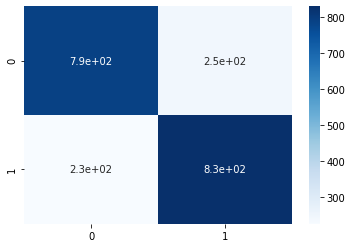

In [15]:
print("Confusion Matrix for \'title\' column!")
sns.heatmap(mat1, annot=True,cmap='Blues')

<h3>Confusion Matrix 2</h3>

Confusion Matrix for 'text' column!


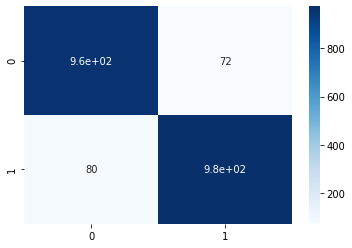

In [16]:
print("Confusion Matrix for \'text\' column!")
sns.heatmap(mat2, annot=True,cmap='Blues')

<H1>Observation</H1>

<p>We see that the 'text' column, after appliying classification, gives a way better accuracy than the 'title' column.

<h1>Result</h1>

<p>The 'text' column qualifies to be the better choice so as to identify REAL or FAKE news.